# 신경망 구현

In [13]:
import numpy as np

## AND gate

In [6]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    y = x1*w1 + x2*w2

    if y > theta:
        return 1
    elif y <= theta:
        return 0

## bias

In [7]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    y = np.sum(w*x) + b

    if y <= 0:
        return 0
    else:
        return 1

In [8]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


## NAND Gate

In [9]:
def NAND(x1, x2):
    x= np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    y = np.sum(w*x) + b

    if y<=0:
        return 0
    else:
        return 1

In [10]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## OR Gate

In [61]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2

    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1

In [62]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


## XOR Gate

In [63]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [64]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## 시그모이드 함수 구현

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [12]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

## ReLu 함수 구현

In [19]:
def ReLU(x):
    mask = (x <= 0)
    out = x.copy()
    out[mask] = 0

    return out

In [21]:
def ReLU(x):
    return np.maximum(0, x)

In [22]:
x = np.array([2, 1, -1])
ReLU(x)

array([2, 1, 0])

## MLP(Multi Layer Perceptron) 구현

In [28]:
import numpy as np

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1 , W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = a3

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## SOFTMAX 구현

In [30]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = sum(exp_x)
    y = exp_x/sum_exp_x
    return y

In [31]:
print(softmax([2,1,-1]))

[0.70538451 0.25949646 0.03511903]


# MNIST 손글씨

In [48]:
def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    def _change_one_hot_label(X):
        T = np.zeros((X.size, 10))
        for idx, row in enumerate(T):
            row[X[idx]] = 1

        return T

    with open('/Users/hosung/avangers/study/nlp/Deep_nlp/data/mnist_data/mnist.pkl', 'rb') as f:
        dataset = pickle.load(f)
        
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


In [49]:
import numpy as np
import pickle


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)



In [50]:
x_train.shape

(60000, 784)

In [51]:
x_train[0].shape

(784,)

In [53]:
t_train[0]

5

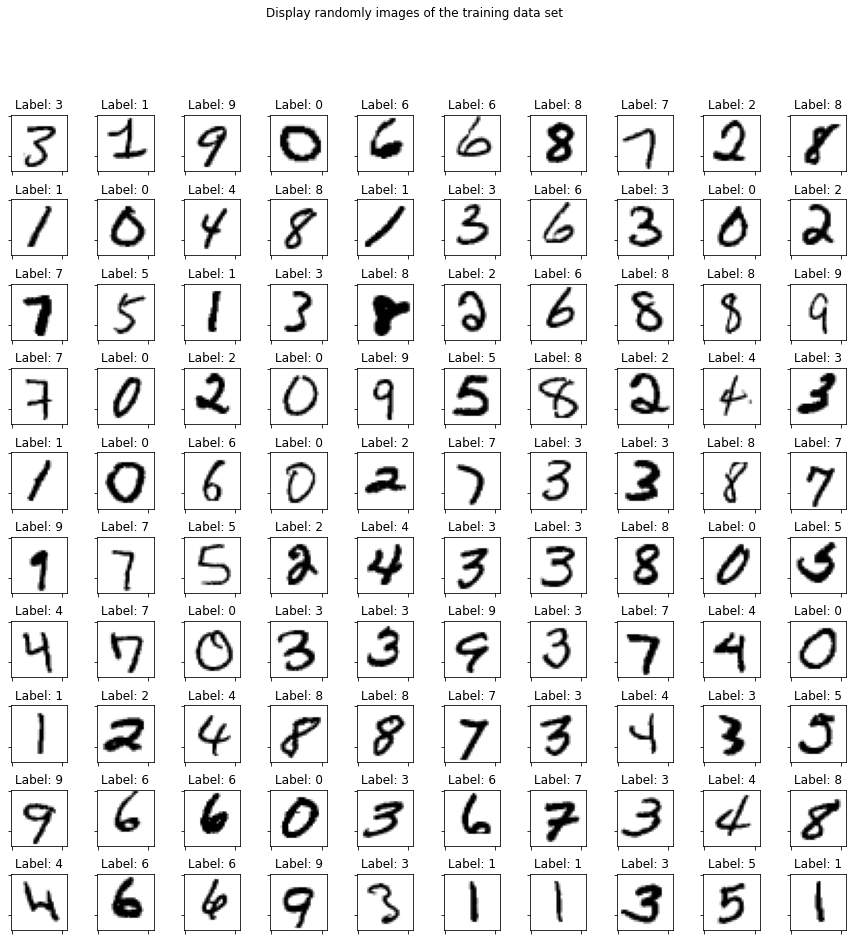

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def displayData(X,Y):
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15, 15))
    fig.suptitle('Display randomly images of the training data set')

    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind, :].reshape(28, 28)
            ax[i, j].set_title("Label: {}".format(Y[ind]))
            ax[i, j].imshow(tmp, cmap='gray_r')
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
            
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(x_train,t_train)  

In [55]:

def init_network():
    with open('/Users/hosung/avangers/study/nlp/Deep_nlp/data/mnist_data/sample_weight.pkl','rb') as f:
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


model = init_network()


In [56]:
print("W1", model['W1'].shape)
print('b1', model['b1'].shape)
print('W2', model['W2'].shape)
print('b2', model['b2'].shape)
print('W3', model['W3'].shape)
print('b3', model['b3'].shape)

W1 (784, 50)
b1 (50,)
W2 (50, 100)
b2 (100,)
W3 (100, 10)
b3 (10,)


In [57]:
x_test.shape

(10000, 784)

In [58]:
accuracy_cnt = 0

for i in range(len(x_test)):
    y = predict(model, x_test[i])
    if i == 0:
        print(y)
        print(t_test[i])
    p = np.argmax(y)
    if p == t_test[i]:
        accuracy_cnt +=1

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))


[8.4412546e-05 2.6350660e-06 7.1549520e-04 1.2586276e-03 1.1727959e-06
 4.4990877e-05 1.6269331e-08 9.9706495e-01 9.3744875e-06 8.1831252e-04]
7
Accuracy:0.9352


## batch

In [66]:
%%time
network = init_network()
accuracy_cnt = 0
batch_size = 100
for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    t_batch = predict(network, x_batch)
    
    p = np.argmax(t_batch, axis=1)
    accuracy_cnt += np.sum(p == t_test[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))

Accuracy:0.9207
CPU times: user 226 ms, sys: 5.63 ms, total: 232 ms
Wall time: 30 ms


In [67]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [68]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [69]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [70]:
s = 0
for i in range(len(X)):
    temp_s = softmax(X[i])
    print(temp_s)
                     
    s += temp_s
s

[0.26894142 0.73105858]
[0.26894142 0.73105858]


array([0.53788284, 1.46211716])

In [71]:
softmax(X)

array([[0.11920292, 0.11920292],
       [0.88079708, 0.88079708]])